In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('immigration_data.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['CO2', 'Country of birth/nationality', 'VAR', 'Variable', 'GEN',
       'Gender', 'COU', 'Country', 'YEA', 'Year', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [4]:
df.drop(columns=['CO2', 'VAR', 'GEN',
       'Gender', 'COU', 'YEA', 'Flag Codes',
       'Flags'], inplace=True)

In [5]:
df.head()

,Country of birth/nationality,Variable,Country,Year,Value
0,Afghanistan,Inflows of foreign population by nationality,Australia,2000,887.0
1,Afghanistan,Inflows of foreign population by nationality,Australia,2001,456.0
2,Afghanistan,Inflows of foreign population by nationality,Australia,2002,660.0
3,Afghanistan,Inflows of foreign population by nationality,Australia,2003,1015.0
4,Afghanistan,Inflows of foreign population by nationality,Australia,2004,1340.0


In [6]:
def emmigration(df, origin):
    df_china = df[df['Country of birth/nationality']==origin]
    df_china_emmigration = df_china[df_china["Variable"]=="Inflows of foreign population by nationality"] 
    df_china_emmigration_total_by_country = df_china_emmigration[["Country","Value"]].groupby("Country").sum().sort_values("Value", ascending=False)
    return df_china_emmigration_total_by_country

In [7]:
def immigration(df, origin):
    df_china = df[df['Country']==origin]
    df_china_emmigration = df_china[df_china["Variable"]=="Inflows of foreign population by nationality"] 
    df_china_emmigration_total_by_country = df_china_emmigration[['Country of birth/nationality',"Value"]].groupby('Country of birth/nationality').sum().sort_values("Value", ascending=False)
    return df_china_emmigration_total_by_country

In [8]:
immigration(df, "China")

,Value
Country of birth/nationality,


In [9]:
df_china_emmigration = emmigration(df, "China")

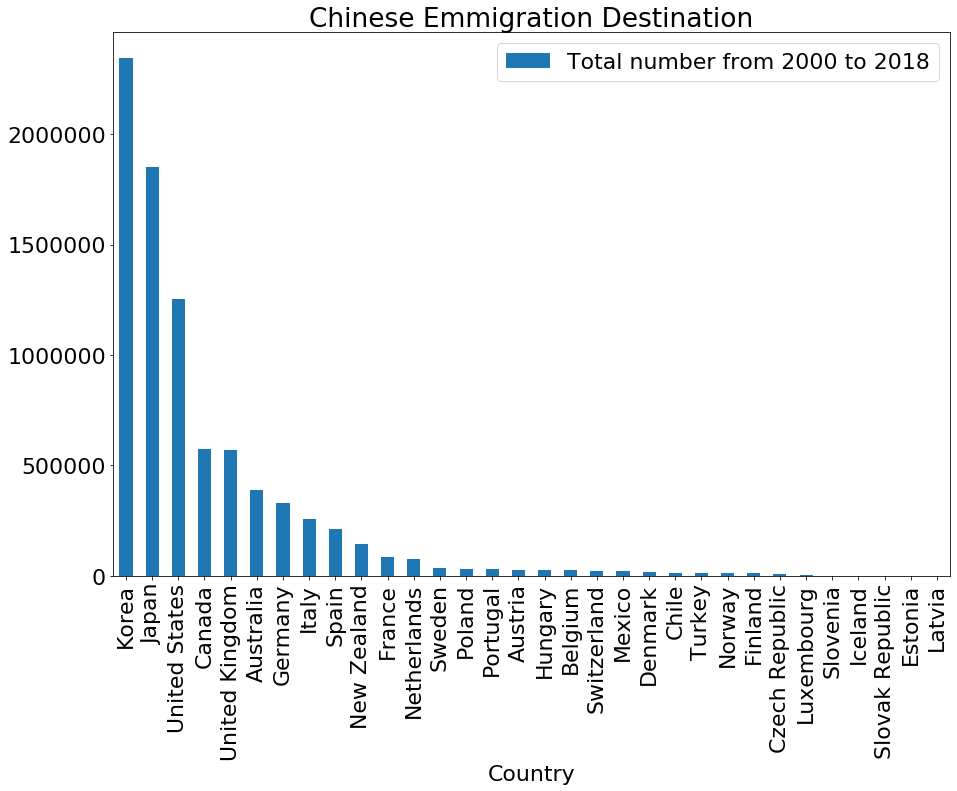

In [10]:
plt.rcParams.update({'font.size': 22})
df_china_emmigration.plot.bar(figsize=(15,10))
plt.title("Chinese Emmigration Destination")
plt.legend(["Total number from 2000 to 2018"])

In [11]:
top_five_destinations = list(df_china_emmigration.index[:5])

In [12]:
top_five_destinations

['Korea', 'Japan', 'United States', 'Canada', 'United Kingdom']

In [13]:
df_china = df[(df['Country of birth/nationality']=="China") & (df["Variable"]=="Inflows of foreign population by nationality")] 

In [14]:
df_china = df_china[df_china.Country.isin(top_five_destinations)]

In [15]:
df_china_graph = df_china[['Country', 'Year', 'Value']]

In [16]:
df_china_graph = df_china_graph.pivot(index='Year', columns='Country', values='Value')
df_china_graph.index = pd.to_datetime(df_china_graph.index, format='%Y')

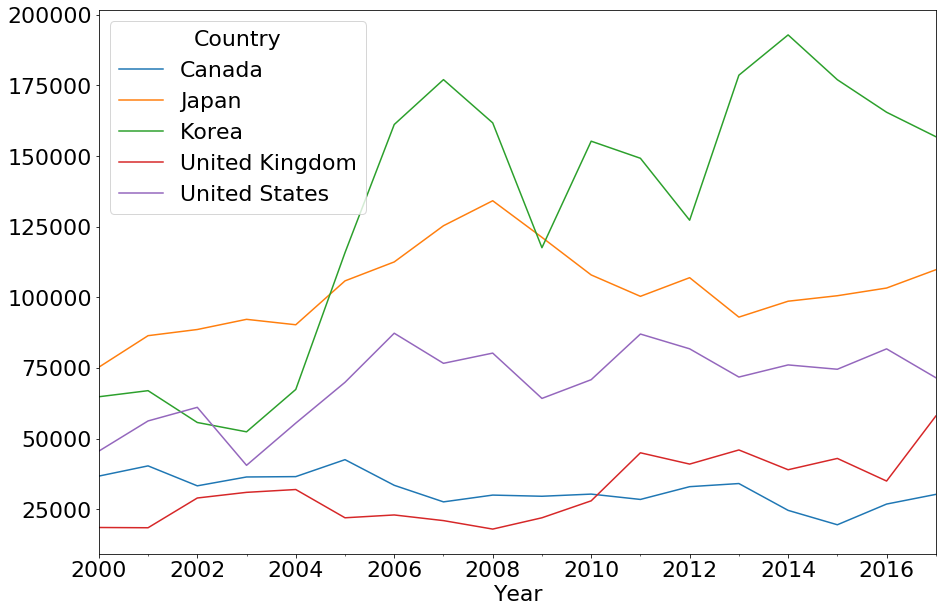

In [17]:
plt.rcParams.update({'font.size': 22})
df_china_graph.plot(figsize=(15,10))

## Plotly ploting

In [21]:
df_china_new = df[(df['Country of birth/nationality']=="China") & (df['Country']=="United States")]

In [40]:
df_china_new = df.query("Country =='United States'").query("Variable == 'Inflows of foreign population by nationality'")

In [41]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

In [44]:
fig = px.bar(df_china_new, x='Year', y='Value', color='Value', hover_data=['Country of birth/nationality', 'Country'], 
            labels={'Value': "Immigration number"})
fig.show()

In [51]:
df_china_new1 = df_china_new[df_china_new['Country of birth/nationality']!='Total']
px.scatter(df_china_new1, y='Value', x='Year', hover_data=['Country of birth/nationality'],
           color='Country of birth/nationality')